[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/019_pandas/pandas.ipynb)

# Pandas

La librería `Pandas` proporciona estructuras de datos y herramientas de análisis de datos fáciles de usar y optimizadas. De la misma forma que en `Numpy` el objeto principal era el `ndarray` (en este [post](https://sensioai.com/blog/007_numpy) puedes aprender sobre `Numpy`) el objeto principal en `Pandas` es el `DataFrame`, que puede considerarse como una tabla alojada en memoria (como una hoja de cálculo de Excel, con nombres de columna y etiquetas de fila). Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, hacer gráficos, etc. `Pandas` se construye por encima de `Numpy`, por lo que podremos aprovechar mucha de la funcionalidad y nomenclatura ya conocemos. La principal diferencia es que con `Pandas` vamos a poder trabajar con datos heterogéneos, mientras que en `Numpy` necesitamos que nuestras estructuras de datos sean siempre del mismo tipo para poder llevar a cabo operaciones. Para poder empezar a trabajar con `Pandas` simplemente tenemos que importarlo como cualquier otra librería.


In [1]:
import pandas as pd

> 💡Es común importar `Pandas` con el nombre `pd`. Recuerda que si no tienes instalada la librería puedes hacerlo con `pip install pandas` o bien `conda install pandas` si instalaste `Python` con `Anaconda`.

## El objeto `Serie`

Si bien el objeto principal en `Pandas` hemos dicho que es el `DataFrame`, un `DataFrame` está formado por una colección de `Series`. Es por esto que empezamos explicando este objeto básico. Una `Serie` es un objeto unidimensional similar a una lista o un `array` que contiene una secuencia de valores del mismo tipo. Cada elemento en la `Serie` tiene también una etiqueta asociada, llamada `índice`. Podemos crear una `Serie` de la siguiente manera.

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

Puedes ver la lista con todos los valores (columna de la derecha) y sus índices correspondientes (columna de la izquierda). Al no haber definido índices, `Pandas` asigna por defecto la posición de cada valor en la secuencia. Podemos asignar etiquetas al crear una `Serie` de la siguiente manera

In [3]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

### Indexado

Esto nos permite indexar los valores de la `Serie` utilizando su índice de manera similar a cuando utilizamos un `dict` de `Python`.

In [4]:
s2['alice']

68

Aunque podemos seguir indexando valores directamente por su posición en la secuencia

In [5]:
s2[0]

68

Podemos utilizar una nomenclatura alternativa para explicitar de qué manera estamos accediendo a los valores en una `Serie`, que también podremos usar en un `DataFrame`.

In [7]:
# acceder por etiqueta

s2.loc['alice']

68

In [9]:
# acceder por ínidice

s2.iloc[0]

68

Como puedes ver una `Serie` es muy similar a un `dict`, de hecho la manera más común de inicializar objetos en `Pandas` es a partir de `dict`s.

In [11]:
data = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(data)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

### Operaciones

Podemos operar con `Series` como si de `arrays` de `Numpy` se tratase, y muchas funciones de `Numpy` aceptan `Series` como argumentos.

In [12]:
s3 + 2

alice     70
bob       85
colin     88
darwin    70
dtype: int64

In [15]:
s3 * 2

alice     136
bob       166
colin     172
darwin    136
dtype: int64

In [14]:
import numpy as np

np.exp(s3)

alice     3.404276e+29
bob       1.112864e+36
colin     2.235247e+37
darwin    3.404276e+29
dtype: float64

> ⚡ Las reglas del `broadcasting` que aprendimos en este [post](https://sensioai.com/blog/008_numpy_aop) siguen aplicándose en `Pandas`.

Y también, del mismo modo, utilizar todas las reglas de indexación que aprendimos para `Numpy`, como por ejemplo el `slicing` y el `masking`.

In [17]:
# escoger los dos últimos elementos

s3[-2:]

colin     86
darwin    68
dtype: int64

In [18]:
# filtrado

s3[s3 > 80]

bob      83
colin    86
dtype: int64

También podemos llevar a cabo operaciones entre `Series`, en estos casos `Pandas` alineará de manera automática los diferentes objetos para hacer coincidir las mismas etiquetas. El resultado será la unión de las diferentes `Series`, introduciendo el valor `NaN` (not a number) para aquellas etiquetas que no estén presente en todos los objetos involucrados.

In [19]:
s2 = pd.Series({"alice": 68, "bob": 83, "colin": 86, "darwin": 68})
s3 = pd.Series({"alice": 68, "bob": 83, "charles": 86, "darwin": 68})

s2 + s3

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

### Visualización

Por último, podemos visualizar los datos en una `Serie` gracias a su integración con [Matplotlib](https://matplotlib.org/), una librería de visualización muy útil de la cual hablaremos en futuros posts. Aquí puedes ver un ejemplo para visualizar todos los valores alamacenados en una `Serie`, simplemente llamando a la función `plot()` directamente sobre el objeto.

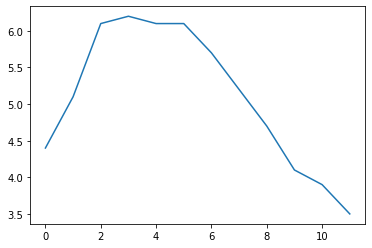

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s = pd.Series(temperatures, name="Temperature")
s.plot()
plt.show()

> En futuros posts encontrarás como trabajar con `Matplotlib` para generar visualizaciones con calidad para artículos o informes. Aprenderás cómo añadir títulos a la gráficas, customizar los ejes, añadir varias `Series` en una misma gráfica, generar visualizaciones con varias gráficas a la vez e incluso generar animaciones que podrás descargar como vídeos o gifs.

## El objeto `DataFrame`

Puedes ver un `DataFrame` como una hoja de cálculo, con valores en celdas, nombres de columna y etiquetas de índice para cada fila. Permite definir expresiones para calcular columnas basadas en otras columnas, crear tablas dinámicas, agrupar filas, dibujar gráficos, etc. Ahora que conocemos el objeto `Serie`, también podemos ver un DataFrames como diccionarios de `Series`.

In [59]:
data = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

df = pd.DataFrame(data)

df

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Como puedes ver las diferentes `Series` han sido alineadas automáticamente, añadiendo valores `NaN` en aquellas entradas no presentes en una `Serie` determinada pero que sí aparecen en otras. Estos valores se conocen como *missing values*, y más adelante hablamos de diferente funcionalidad que `Pandas` nos ofrece para tratarlos, ya que nuestros modelos de `Machine Learning` no son capaces de trabajar con este tipo de valores. Igual que hemos visto anteriormente, la forma más común de crear un `DataFrame` es a partir de un `dict`.

In [60]:
df = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})

df

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Es posible tener estructuras de datos de más de dos dimensiones, para ello tenemos que proveer a `Pandas` de índices de alto nivel

In [61]:
df2 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)

df2

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

### Indexado

Podemos acceder a los valores de cualquier columna mediante su nombre.

In [62]:
df["weight"]

alice       68
bob         83
charles    112
Name: weight, dtype: int64

Como puedes ver el resultado es una `Serie` con los valores y las etiquetas de todos los elementos de la columna. Podemos acceder a varias columnas a la vez mediante una lista de nombres

In [63]:
df[["weight", "birthyear"]]

,weight,birthyear
alice,68,1985
bob,83,1984
charles,112,1992


En este caso el resultado es un nuevo `DataFrame` que contiene sólo las columnas seleccionadas. Para acceder a los valores por filas, utilizamos la misma nomenclatura utilizada para indexar `Series`.

In [64]:
# indexamos con la etiqueta

df.loc["alice"]

birthyear      1985
hobby        Biking
weight           68
children        NaN
Name: alice, dtype: object

In [65]:
# indexamos con la posición

df.iloc[0]

birthyear      1985
hobby        Biking
weight           68
children        NaN
Name: alice, dtype: object

### Crear y eliminar columnas

Podemos crear nuevas columnas de la siguiente manera

In [68]:
df["height"] = pd.Series({"alice": 167, "bob": 180})

df

,birthyear,hobby,weight,children,height
alice,1985,Biking,68,NaN,167.0
bob,1984,Dancing,83,3.0,180.0
charles,1992,NaN,112,0.0,NaN


Del mismo modo, así es como eliminaríamos una columna

In [73]:
del df["height"]

df

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Por defecto, las nuevas columnas se añaden en la última posición. Podemos insertar la columna en una posición determinada con la función `insert`.

In [74]:
# añade la nueva columna en la posición 2

df.insert(2, "height", pd.Series({"alice": 167, "bob": 180}))

df

,birthyear,hobby,height,weight,children
alice,1985,Biking,167.0,68,NaN
bob,1984,Dancing,180.0,83,3.0
charles,1992,NaN,NaN,112,0.0


También podemos crear nuevas columnas a partir de otras de manera sencilla

In [75]:
df["w2h_ratio"] = df["weight"] / df["height"]

df

,birthyear,hobby,height,weight,children,w2h_ratio
alice,1985,Biking,167.0,68,NaN,0.407186
bob,1984,Dancing,180.0,83,3.0,0.461111
charles,1992,NaN,NaN,112,0.0,NaN


### Operaciones

Del mismo modo que con las `Serie`s, podemos llevar a cabo operaciones con `DataFrame`s. En este caso tendremos que tener en cuenta que las operaciones estén definidas para todos los diferentes tipos de datos almacenados en el objeto.

In [78]:
df = df[["weight", "height"]]

df

,weight,height
alice,68,167.0
bob,83,180.0
charles,112,NaN


In [79]:
df + 2

,weight,height
alice,70,169.0
bob,85,182.0
charles,114,NaN


In [80]:
np.exp(df)

,weight,height
alice,3.404276e+29,3.366499e+72
bob,1.112864e+36,1.489384e+78
charles,4.375039e+48,NaN


Podemos usar el indexado de tipo `masking` para filtrar los valores de un `DataFrame`.

In [81]:
df[df["weight"] > 80]

,weight,height
bob,83,180.0
charles,112,NaN


In [85]:
df[(df["weight"] > 80) & (df["height"] >= 180)]

,weight,height
bob,83,180.0


### Visualización

También podemos utilizar la función `plot()` sobre un `DataFrame` para visualizar los datos de manera rápida. Esto es especialmente útil cuando todos los datos que tenemos son de tipo numérico.

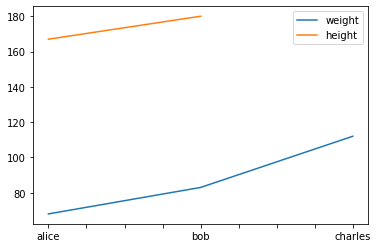

In [88]:
df.plot()
plt.show()

> ⚡ Una manera muy rápida de visualizar todos los datos en un `dict` con listas de valores es crear un `DataFrame` y simplemente llamar a la función `plot()`. 

## Resumen

En este post hemos introducido la librería para el análisis de datos `Pandas`. Este módulo, construido encima de `Numpy`, nos permite trabajar con datos tabulares gracias al objeto `DataFrame`. Este objeto nos permite llevar a cabo las operaciones básicas para el análisis de datos de manera eficiente y con una sintaxis sencilla. En los próximos posts aprenderemos funcionalidad más avanzada como por ejemplo ordenar, filtrar y seleccionar elementos, guardar y cargar datos de archivos, tratar *missing values* y trabajar con datos especiales de tipo categórico así como datos temporales.